<a href="https://colab.research.google.com/github/joaopcnogueira/colab-notebooks/blob/main/Time_Series_Intraday_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/ranaroussi/yfinance
!pip install yfinance

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf

# Dados Intraday de Duas Ações

Para adicionar mais, basta passar o código da ação no parâmetro tickers.

In [47]:
# Interval required 5 minutes
data = yf.download(tickers='MGLU3.SA LAME4.SA', period='60d', interval='5m')

[*********************100%***********************]  2 of 2 completed


In [48]:
data.head()

Adj Close             ...    Volume          
                            LAME4.SA   MGLU3.SA  ...  LAME4.SA  MGLU3.SA
Datetime                                         ...                    
2021-07-13 10:05:00-03:00  20.850000  21.940001  ...   29300.0  108300.0
2021-07-13 10:10:00-03:00  20.879999  21.959999  ...   76000.0  195700.0
2021-07-13 10:15:00-03:00  20.840000  21.850000  ...  114000.0  241100.0
2021-07-13 10:20:00-03:00  20.850000  21.840000  ...   69700.0  289500.0
2021-07-13 10:25:00-03:00  20.840000  21.830000  ...   43000.0  269800.0

[5 rows x 12 columns]

In [49]:
data.tail()

Adj Close           ...    Volume          
                           LAME4.SA MGLU3.SA  ...  LAME4.SA  MGLU3.SA
Datetime                                      ...                    
2021-10-05 11:05:00-03:00      4.80    13.82  ...  900800.0  396300.0
2021-10-05 11:10:00-03:00      4.80    13.81  ...  491100.0  160400.0
2021-10-05 11:15:00-03:00      4.75    13.73  ...  428800.0  445500.0
2021-10-05 11:19:04-03:00       NaN    13.74  ...       NaN       0.0
2021-10-05 11:19:05-03:00      4.75      NaN  ...       0.0       NaN

[5 rows x 12 columns]

In [51]:
data = data.reset_index()
data.head()

Datetime  Adj Close  ...    Volume          
                              LAME4.SA  ...  LAME4.SA  MGLU3.SA
0 2021-07-13 10:05:00-03:00  20.850000  ...   29300.0  108300.0
1 2021-07-13 10:10:00-03:00  20.879999  ...   76000.0  195700.0
2 2021-07-13 10:15:00-03:00  20.840000  ...  114000.0  241100.0
3 2021-07-13 10:20:00-03:00  20.850000  ...   69700.0  289500.0
4 2021-07-13 10:25:00-03:00  20.840000  ...   43000.0  269800.0

[5 rows x 13 columns]

In [52]:
# removendo a timezone para salvar em excel
data['Datetime'] = data['Datetime'].dt.tz_localize(None)
data.head()

Datetime  Adj Close             ...       Open    Volume          
                        LAME4.SA   MGLU3.SA  ...   MGLU3.SA  LAME4.SA  MGLU3.SA
0 2021-07-13 10:05:00  20.850000  21.940001  ...  21.969999   29300.0  108300.0
1 2021-07-13 10:10:00  20.879999  21.959999  ...  21.940001   76000.0  195700.0
2 2021-07-13 10:15:00  20.840000  21.850000  ...  21.959999  114000.0  241100.0
3 2021-07-13 10:20:00  20.850000  21.840000  ...  21.850000   69700.0  289500.0
4 2021-07-13 10:25:00  20.840000  21.830000  ...  21.840000   43000.0  269800.0

[5 rows x 13 columns]

In [54]:
data.to_excel('stock-intraday-last-60d.xlsx', index=True)

# Dados Diários

In [56]:
# Interval required 5 minutes
df = yf.download(tickers='MGLU3.SA LAME4.SA', period='60d')

[*********************100%***********************]  2 of 2 completed


In [57]:
df.head()

Adj Close                Close  ...       Open     Volume          
            LAME4.SA   MGLU3.SA  LAME4.SA  ...   MGLU3.SA   LAME4.SA  MGLU3.SA
Date                                       ...                                
2021-07-13  8.846459  22.490000  8.846459  ...  21.969999   20237765  22948200
2021-07-14  8.747014  22.930000  8.747014  ...  22.600000   21381955  29771000
2021-07-15  8.531549  23.719999  8.531549  ...  23.900000   21066283  60427800
2021-07-16  8.659999  23.900000  8.659999  ...  23.820000   72105002  25944100
2021-07-19  7.900000  23.120001  7.900000  ...  23.650000  146198600  19528800

[5 rows x 12 columns]

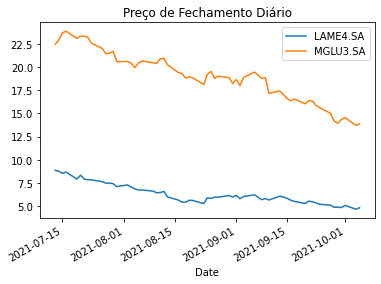

In [63]:
df['Close'].plot(title='Preço de Fechamento Diário');